# Keras_Mnist_CNN

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 資料預處理

In [2]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [3]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [4]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [5]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

# 訓練數據 (Relu)

In [7]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))

In [8]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [9]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) 

In [11]:
train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=15, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
 - 29s - loss: 0.5284 - acc: 0.8399 - val_loss: 0.1636 - val_acc: 0.9547
Epoch 2/15
 - 29s - loss: 0.2092 - acc: 0.9365 - val_loss: 0.1018 - val_acc: 0.9705
Epoch 3/15
 - 29s - loss: 0.1497 - acc: 0.9553 - val_loss: 0.0793 - val_acc: 0.9777
Epoch 4/15
 - 28s - loss: 0.1235 - acc: 0.9635 - val_loss: 0.0673 - val_acc: 0.9806
Epoch 5/15
 - 27s - loss: 0.1054 - acc: 0.9689 - val_loss: 0.0590 - val_acc: 0.9823
Epoch 6/15
 - 27s - loss: 0.0921 - acc: 0.9724 - val_loss: 0.0571 - val_acc: 0.9828
Epoch 7/15
 - 29s - loss: 0.0839 - acc: 0.9745 - val_loss: 0.0526 - val_acc: 0.9844
Epoch 8/15
 - 28s - loss: 0.0774 - acc: 0.9757 - val_loss: 0.0492 - val_acc: 0.9854
Epoch 9/15
 - 29s - loss: 0.0713 - acc: 0.9779 - val_loss: 0.0458 - val_acc: 0.9858
Epoch 10/15
 - 29s - loss: 0.0639 - acc: 0.9805 - val_loss: 0.0452 - val_acc: 0.9854
Epoch 11/15
 - 27s - loss: 0.0616 - acc: 0.9811 - val_loss: 0.0429 - val_acc: 0.9864
Epoch 12/15
 - 28s - los

In [12]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

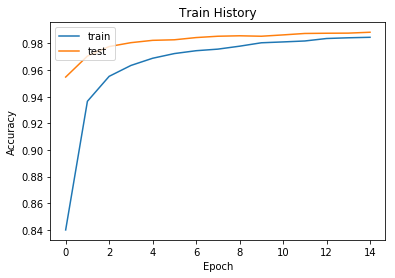

In [13]:
show_train_history('acc','val_acc')

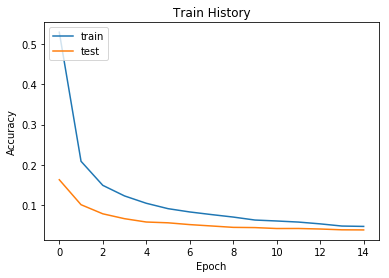

In [14]:
show_train_history('loss','val_loss')

In [15]:
# 評估準確率
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 3s 295us/step


0.9878

# 訓練數據 (Sigmoid)

In [16]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='sigmoid'))

In [17]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [18]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) 

In [20]:
train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=15, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
 - 28s - loss: 2.3187 - acc: 0.1135 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 2/15
 - 28s - loss: 2.3012 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 3/15
 - 28s - loss: 2.3011 - acc: 0.1140 - val_loss: 2.3020 - val_acc: 0.1060
Epoch 4/15
 - 28s - loss: 2.3010 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 5/15
 - 29s - loss: 2.3010 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 6/15
 - 30s - loss: 2.3010 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 7/15
 - 30s - loss: 2.3010 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 8/15
 - 29s - loss: 2.3010 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 9/15
 - 31s - loss: 2.3010 - acc: 0.1140 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 10/15
 - 30s - loss: 2.3010 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 11/15
 - 31s - loss: 2.3010 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 12/15
 - 30s - los

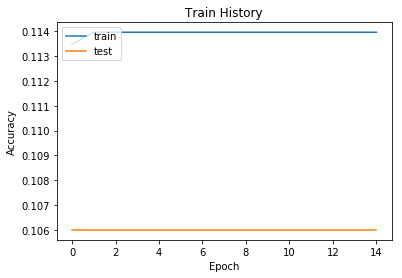

In [21]:
show_train_history('acc','val_acc')

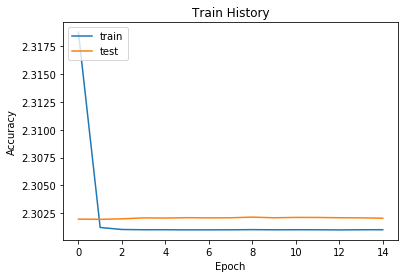

In [22]:
show_train_history('loss','val_loss')

In [23]:
# 評估準確率
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 4s 353us/step


0.1135

# 使用不同的batch size

In [24]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))

In [25]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) 

設batch_size=100

In [27]:
train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=15, batch_size=100,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
 - 32s - loss: 0.3619 - acc: 0.8913 - val_loss: 0.1025 - val_acc: 0.9711
Epoch 2/15
 - 32s - loss: 0.1440 - acc: 0.9578 - val_loss: 0.0681 - val_acc: 0.9796
Epoch 3/15
 - 33s - loss: 0.1060 - acc: 0.9679 - val_loss: 0.0539 - val_acc: 0.9837
Epoch 4/15
 - 33s - loss: 0.0885 - acc: 0.9735 - val_loss: 0.0508 - val_acc: 0.9852
Epoch 5/15
 - 33s - loss: 0.0760 - acc: 0.9769 - val_loss: 0.0472 - val_acc: 0.9855
Epoch 6/15
 - 34s - loss: 0.0665 - acc: 0.9793 - val_loss: 0.0424 - val_acc: 0.9872
Epoch 7/15
 - 33s - loss: 0.0609 - acc: 0.9820 - val_loss: 0.0430 - val_acc: 0.9879
Epoch 8/15
 - 34s - loss: 0.0565 - acc: 0.9819 - val_loss: 0.0392 - val_acc: 0.9890
Epoch 9/15
 - 34s - loss: 0.0517 - acc: 0.9840 - val_loss: 0.0408 - val_acc: 0.9885
Epoch 10/15
 - 34s - loss: 0.0484 - acc: 0.9846 - val_loss: 0.0382 - val_acc: 0.9894
Epoch 11/15
 - 33s - loss: 0.0459 - acc: 0.9855 - val_loss: 0.0411 - val_acc: 0.9880
Epoch 12/15
 - 34s - los

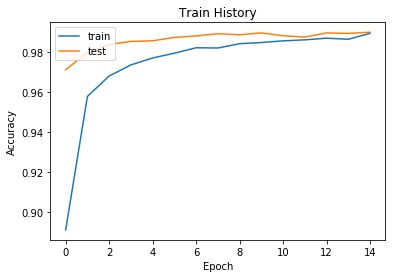

In [28]:
show_train_history('acc','val_acc')

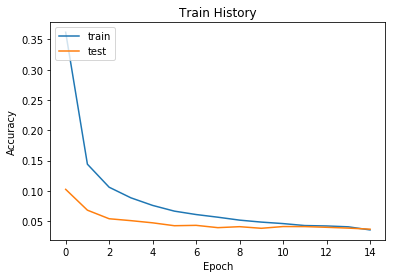

In [29]:
show_train_history('loss','val_loss')

設batch_size=200

In [30]:
train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=15, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
 - 31s - loss: 0.0303 - acc: 0.9902 - val_loss: 0.0375 - val_acc: 0.9898
Epoch 2/15
 - 30s - loss: 0.0267 - acc: 0.9914 - val_loss: 0.0361 - val_acc: 0.9898
Epoch 3/15
 - 29s - loss: 0.0261 - acc: 0.9915 - val_loss: 0.0372 - val_acc: 0.9904
Epoch 4/15
 - 28s - loss: 0.0276 - acc: 0.9907 - val_loss: 0.0367 - val_acc: 0.9901
Epoch 5/15
 - 28s - loss: 0.0255 - acc: 0.9917 - val_loss: 0.0360 - val_acc: 0.9897
Epoch 6/15
 - 29s - loss: 0.0262 - acc: 0.9908 - val_loss: 0.0386 - val_acc: 0.9898
Epoch 7/15
 - 30s - loss: 0.0242 - acc: 0.9921 - val_loss: 0.0371 - val_acc: 0.9898
Epoch 8/15
 - 29s - loss: 0.0246 - acc: 0.9919 - val_loss: 0.0376 - val_acc: 0.9903
Epoch 9/15
 - 29s - loss: 0.0235 - acc: 0.9918 - val_loss: 0.0385 - val_acc: 0.9899
Epoch 10/15
 - 29s - loss: 0.0223 - acc: 0.9925 - val_loss: 0.0383 - val_acc: 0.9896
Epoch 11/15
 - 29s - loss: 0.0220 - acc: 0.9924 - val_loss: 0.0379 - val_acc: 0.9897
Epoch 12/15
 - 30s - los

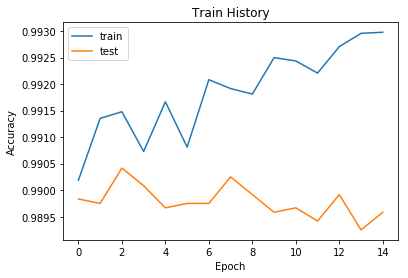

In [31]:
show_train_history('acc','val_acc')

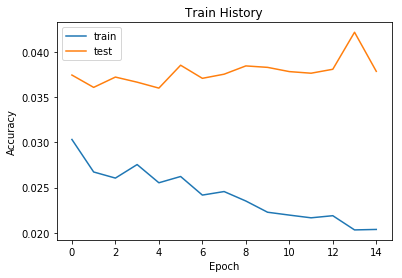

In [32]:
show_train_history('loss','val_loss')

設batch_size=300

In [33]:
train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=15, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
 - 29s - loss: 0.0174 - acc: 0.9939 - val_loss: 0.0373 - val_acc: 0.9896
Epoch 2/15
 - 28s - loss: 0.0184 - acc: 0.9938 - val_loss: 0.0378 - val_acc: 0.9898
Epoch 3/15
 - 29s - loss: 0.0177 - acc: 0.9938 - val_loss: 0.0393 - val_acc: 0.9896
Epoch 4/15
 - 28s - loss: 0.0160 - acc: 0.9947 - val_loss: 0.0372 - val_acc: 0.9903
Epoch 5/15
 - 26s - loss: 0.0156 - acc: 0.9945 - val_loss: 0.0398 - val_acc: 0.9898
Epoch 6/15
 - 28s - loss: 0.0170 - acc: 0.9941 - val_loss: 0.0408 - val_acc: 0.9893
Epoch 7/15
 - 27s - loss: 0.0175 - acc: 0.9944 - val_loss: 0.0413 - val_acc: 0.9893
Epoch 8/15
 - 27s - loss: 0.0154 - acc: 0.9944 - val_loss: 0.0396 - val_acc: 0.9893
Epoch 9/15
 - 29s - loss: 0.0159 - acc: 0.9940 - val_loss: 0.0410 - val_acc: 0.9898
Epoch 10/15
 - 27s - loss: 0.0149 - acc: 0.9948 - val_loss: 0.0442 - val_acc: 0.9898
Epoch 11/15
 - 27s - loss: 0.0144 - acc: 0.9950 - val_loss: 0.0429 - val_acc: 0.9895
Epoch 12/15
 - 25s - los

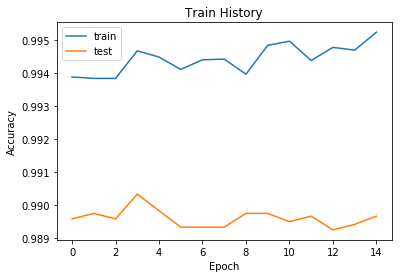

In [34]:
show_train_history('acc','val_acc')

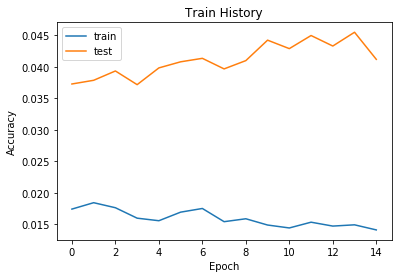

In [35]:
show_train_history('loss','val_loss')

# 使用不同的Optimization

SGD

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=15, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
 - 30s - loss: 0.0133 - acc: 0.9954 - val_loss: 0.0416 - val_acc: 0.9900
Epoch 2/15
 - 29s - loss: 0.0136 - acc: 0.9953 - val_loss: 0.0417 - val_acc: 0.9902
Epoch 3/15
 - 29s - loss: 0.0134 - acc: 0.9955 - val_loss: 0.0416 - val_acc: 0.9906
Epoch 4/15
 - 29s - loss: 0.0134 - acc: 0.9954 - val_loss: 0.0414 - val_acc: 0.9908
Epoch 5/15
 - 29s - loss: 0.0122 - acc: 0.9960 - val_loss: 0.0417 - val_acc: 0.9908
Epoch 6/15
 - 29s - loss: 0.0140 - acc: 0.9950 - val_loss: 0.0413 - val_acc: 0.9908
Epoch 7/15
 - 29s - loss: 0.0144 - acc: 0.9951 - val_loss: 0.0413 - val_acc: 0.9904
Epoch 8/15
 - 29s - loss: 0.0119 - acc: 0.9959 - val_loss: 0.0413 - val_acc: 0.9907
Epoch 9/15
 - 29s - loss: 0.0128 - acc: 0.9956 - val_loss: 0.0416 - val_acc: 0.9905
Epoch 10/15
 - 29s - loss: 0.0130 - acc: 0.9953 - val_loss: 0.0413 - val_acc: 0.9906
Epoch 11/15
 - 29s - loss: 0.0132 - acc: 0.9958 - val_loss: 0.0412 - val_acc: 0.9905
Epoch 12/15
 - 29s - los

Adam

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=15, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
 - 30s - loss: 0.0158 - acc: 0.9945 - val_loss: 0.0428 - val_acc: 0.9904
Epoch 2/15
 - 29s - loss: 0.0136 - acc: 0.9955 - val_loss: 0.0442 - val_acc: 0.9901
Epoch 3/15
 - 29s - loss: 0.0160 - acc: 0.9946 - val_loss: 0.0437 - val_acc: 0.9898
Epoch 4/15
 - 29s - loss: 0.0146 - acc: 0.9951 - val_loss: 0.0435 - val_acc: 0.9893
Epoch 5/15
 - 30s - loss: 0.0138 - acc: 0.9950 - val_loss: 0.0415 - val_acc: 0.9907
Epoch 6/15
 - 30s - loss: 0.0141 - acc: 0.9951 - val_loss: 0.0430 - val_acc: 0.9903
Epoch 7/15
 - 30s - loss: 0.0130 - acc: 0.9951 - val_loss: 0.0451 - val_acc: 0.9902
Epoch 8/15
 - 28s - loss: 0.0145 - acc: 0.9952 - val_loss: 0.0442 - val_acc: 0.9903
Epoch 9/15
 - 28s - loss: 0.0141 - acc: 0.9949 - val_loss: 0.0446 - val_acc: 0.9898
Epoch 10/15
 - 27s - loss: 0.0129 - acc: 0.9955 - val_loss: 0.0439 - val_acc: 0.9903
Epoch 11/15
 - 29s - loss: 0.0139 - acc: 0.9956 - val_loss: 0.0423 - val_acc: 0.9905
Epoch 12/15
 - 28s - los

Adagrad

In [38]:
model.compile(loss='categorical_crossentropy', optimizer='adagrad',metrics=['accuracy'])
train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=15, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
 - 22s - loss: 0.0201 - acc: 0.9938 - val_loss: 0.0455 - val_acc: 0.9900
Epoch 2/15
 - 21s - loss: 0.0123 - acc: 0.9958 - val_loss: 0.0468 - val_acc: 0.9906
Epoch 3/15
 - 21s - loss: 0.0103 - acc: 0.9963 - val_loss: 0.0472 - val_acc: 0.9896
Epoch 4/15
 - 21s - loss: 0.0112 - acc: 0.9961 - val_loss: 0.0466 - val_acc: 0.9901
Epoch 5/15
 - 22s - loss: 0.0097 - acc: 0.9965 - val_loss: 0.0452 - val_acc: 0.9902
Epoch 6/15
 - 22s - loss: 0.0106 - acc: 0.9966 - val_loss: 0.0436 - val_acc: 0.9907
Epoch 7/15
 - 21s - loss: 0.0102 - acc: 0.9964 - val_loss: 0.0442 - val_acc: 0.9907
Epoch 8/15
 - 22s - loss: 0.0084 - acc: 0.9970 - val_loss: 0.0428 - val_acc: 0.9900
Epoch 9/15
 - 21s - loss: 0.0082 - acc: 0.9973 - val_loss: 0.0455 - val_acc: 0.9903
Epoch 10/15
 - 23s - loss: 0.0086 - acc: 0.9971 - val_loss: 0.0448 - val_acc: 0.9902
Epoch 11/15
 - 23s - loss: 0.0090 - acc: 0.9971 - val_loss: 0.0439 - val_acc: 0.9902
Epoch 12/15
 - 24s - los

Momentum

In [54]:
model.compile(loss='categorical_crossentropy', optimizer='adagrad',metrics=['accuracy'])
train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=15, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
 - 19s - loss: 0.3069 - acc: 0.9083 - val_loss: 0.1004 - val_acc: 0.9718
Epoch 2/15
 - 19s - loss: 0.1147 - acc: 0.9655 - val_loss: 0.0746 - val_acc: 0.9792
Epoch 3/15
 - 19s - loss: 0.0897 - acc: 0.9725 - val_loss: 0.0635 - val_acc: 0.9812
Epoch 4/15
 - 19s - loss: 0.0755 - acc: 0.9768 - val_loss: 0.0571 - val_acc: 0.9833
Epoch 5/15
 - 19s - loss: 0.0659 - acc: 0.9795 - val_loss: 0.0529 - val_acc: 0.9843
Epoch 6/15
 - 20s - loss: 0.0600 - acc: 0.9811 - val_loss: 0.0502 - val_acc: 0.9857
Epoch 7/15
 - 19s - loss: 0.0545 - acc: 0.9827 - val_loss: 0.0481 - val_acc: 0.9864
Epoch 8/15
 - 21s - loss: 0.0520 - acc: 0.9841 - val_loss: 0.0461 - val_acc: 0.9865
Epoch 9/15
 - 20s - loss: 0.0474 - acc: 0.9854 - val_loss: 0.0435 - val_acc: 0.9870
Epoch 10/15
 - 20s - loss: 0.0449 - acc: 0.9860 - val_loss: 0.0436 - val_acc: 0.9875
Epoch 11/15
 - 21s - loss: 0.0422 - acc: 0.9872 - val_loss: 0.0432 - val_acc: 0.9878
Epoch 12/15
 - 19s - los

# 增加模型複雜度或抽樣訓練 (達到Overfitting)

加L1、L2

In [63]:
# 增加到256
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [64]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               803072    
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                2570      
Total para

In [65]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=15, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
 - 17s - loss: 0.4430 - acc: 0.8651 - val_loss: 0.1448 - val_acc: 0.9577
Epoch 2/15
 - 16s - loss: 0.1712 - acc: 0.9489 - val_loss: 0.0926 - val_acc: 0.9733
Epoch 3/15
 - 17s - loss: 0.1247 - acc: 0.9625 - val_loss: 0.0727 - val_acc: 0.9793
Epoch 4/15
 - 17s - loss: 0.1016 - acc: 0.9689 - val_loss: 0.0652 - val_acc: 0.9808
Epoch 5/15
 - 17s - loss: 0.0825 - acc: 0.9747 - val_loss: 0.0600 - val_acc: 0.9827
Epoch 6/15
 - 17s - loss: 0.0727 - acc: 0.9776 - val_loss: 0.0519 - val_acc: 0.9846
Epoch 7/15
 - 17s - loss: 0.0660 - acc: 0.9798 - val_loss: 0.0479 - val_acc: 0.9859
Epoch 8/15
 - 16s - loss: 0.0587 - acc: 0.9818 - val_loss: 0.0467 - val_acc: 0.9868
Epoch 9/15
 - 17s - loss: 0.0548 - acc: 0.9822 - val_loss: 0.0437 - val_acc: 0.9877
Epoch 10/15
 - 17s - loss: 0.0509 - acc: 0.9843 - val_loss: 0.0418 - val_acc: 0.9876
Epoch 11/15
 - 18s - loss: 0.0449 - acc: 0.9859 - val_loss: 0.0410 - val_acc: 0.9878
Epoch 12/15
 - 17s - los

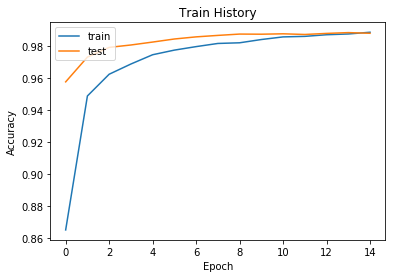

In [66]:
show_train_history('acc','val_acc')

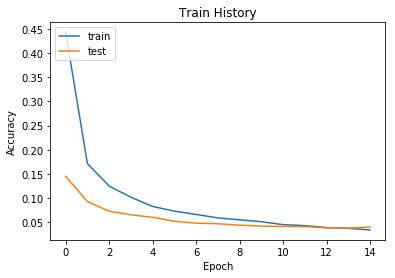

In [67]:
show_train_history('loss','val_loss')

In [71]:
# 增加到1024
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [72]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              3212288   
_________________________________________________________________
dropout_22 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                10250     
Total para

In [73]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=15, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
 - 26s - loss: 0.3120 - acc: 0.9064 - val_loss: 0.0961 - val_acc: 0.9744
Epoch 2/15
 - 27s - loss: 0.1012 - acc: 0.9690 - val_loss: 0.0661 - val_acc: 0.9805
Epoch 3/15
 - 27s - loss: 0.0699 - acc: 0.9783 - val_loss: 0.0515 - val_acc: 0.9858
Epoch 4/15
 - 27s - loss: 0.0548 - acc: 0.9828 - val_loss: 0.0451 - val_acc: 0.9870
Epoch 5/15
 - 26s - loss: 0.0468 - acc: 0.9856 - val_loss: 0.0430 - val_acc: 0.9877
Epoch 6/15
 - 27s - loss: 0.0380 - acc: 0.9877 - val_loss: 0.0405 - val_acc: 0.9881
Epoch 7/15
 - 28s - loss: 0.0335 - acc: 0.9888 - val_loss: 0.0363 - val_acc: 0.9891
Epoch 8/15
 - 27s - loss: 0.0283 - acc: 0.9906 - val_loss: 0.0366 - val_acc: 0.9899
Epoch 9/15
 - 29s - loss: 0.0257 - acc: 0.9916 - val_loss: 0.0357 - val_acc: 0.9901
Epoch 10/15
 - 27s - loss: 0.0230 - acc: 0.9924 - val_loss: 0.0370 - val_acc: 0.9896
Epoch 11/15
 - 28s - loss: 0.0219 - acc: 0.9925 - val_loss: 0.0367 - val_acc: 0.9890
Epoch 12/15
 - 27s - los

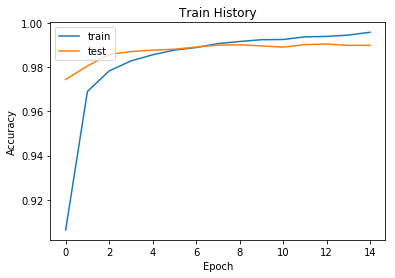

In [74]:
show_train_history('acc','val_acc')

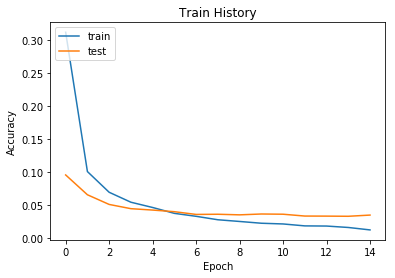

In [75]:
show_train_history('loss','val_loss')